In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")


In [3]:
df=pd.read_csv('Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
df.rename(columns=lambda x: x.replace(' ', ''), inplace=True)
df.isna().sum()
missing_values_percentage = df.isnull().sum() / len(df) * 100
missing_values_percentage
df['Country'].unique()
df['Status'].unique()
df=df[df["Country"].str.contains("Israel")==False]

In [4]:
df.duplicated().sum()

0

In [5]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.2,random_state=42)

In [6]:
num_col=[]
cat_col=[]
for col in df_train.columns:
    if df_train[col].dtype=='object':
        cat_col.append(col)
    else:
        num_col.append(col)
print(cat_col)
print(num_col)

['Country', 'Status']
['Year', 'Lifeexpectancy', 'AdultMortality', 'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB', 'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years', 'thinness5-9years', 'Incomecompositionofresources', 'Schooling']


<Axes: xlabel='Lifeexpectancy'>

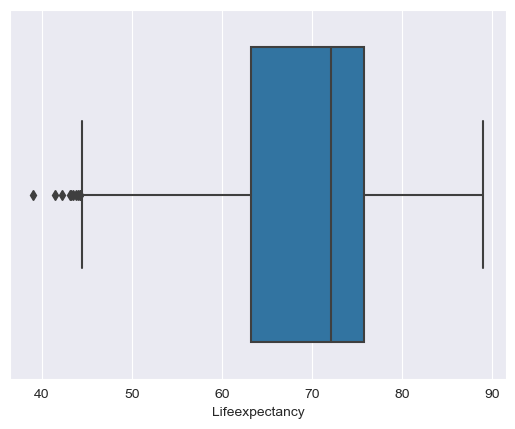

In [7]:
sns.boxplot(data=df_train,x='Lifeexpectancy',fliersize=5)

<Axes: xlabel='Lifeexpectancy', ylabel='Count'>

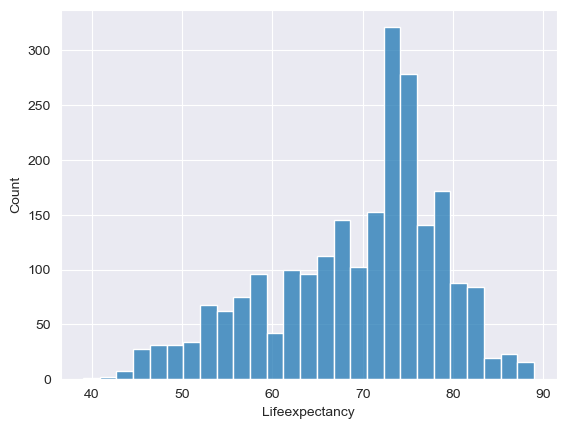

In [8]:
sns.histplot(data=df_train,x='Lifeexpectancy')

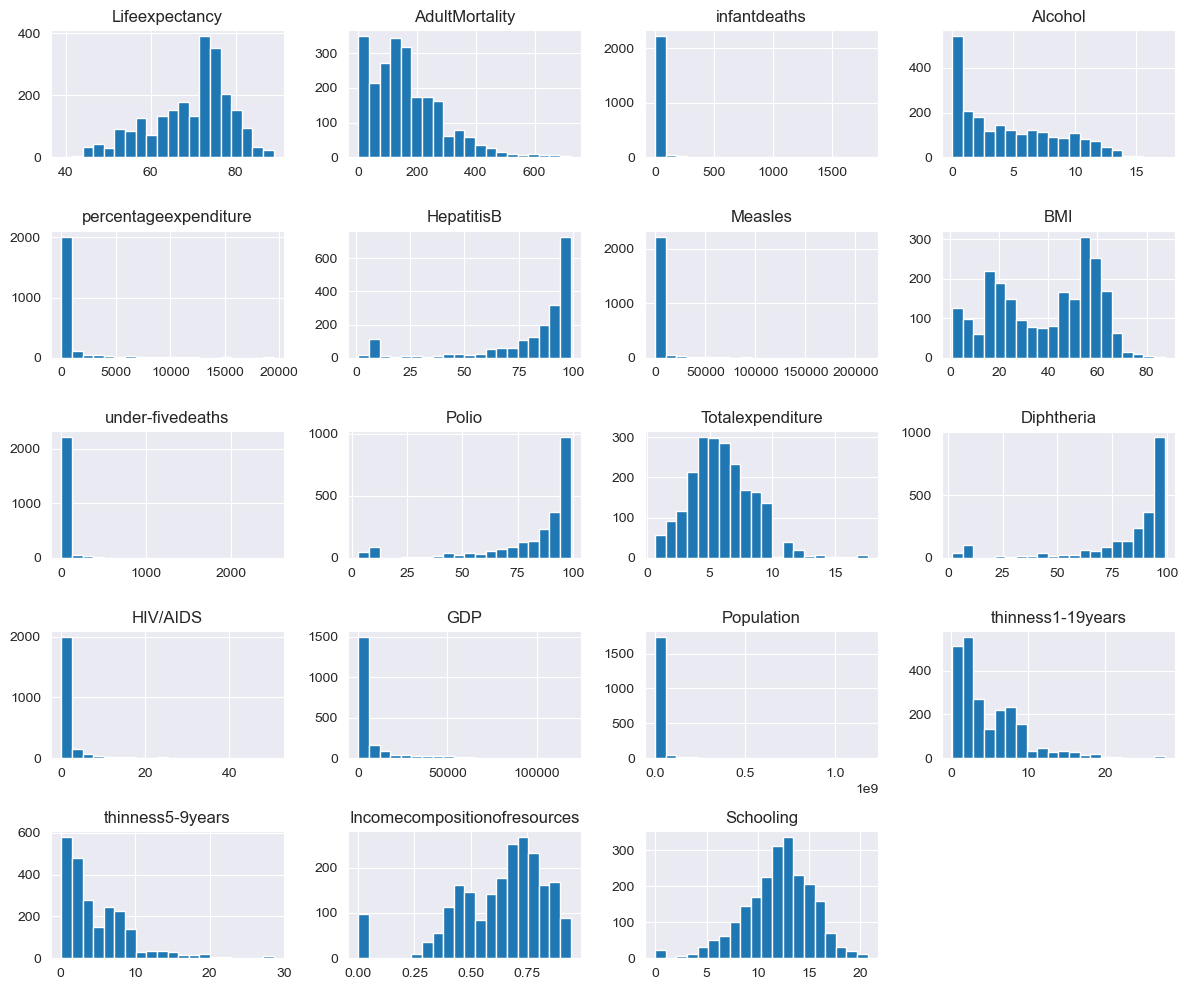

In [9]:
df_train[num_col].drop(columns='Year').hist(bins=20,figsize=(12,10))
plt.tight_layout()
plt.show()

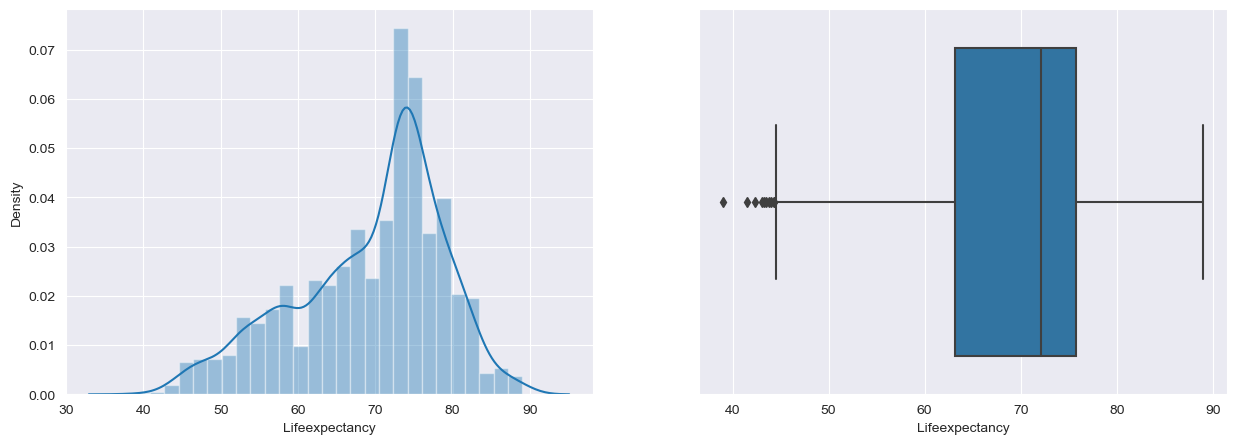

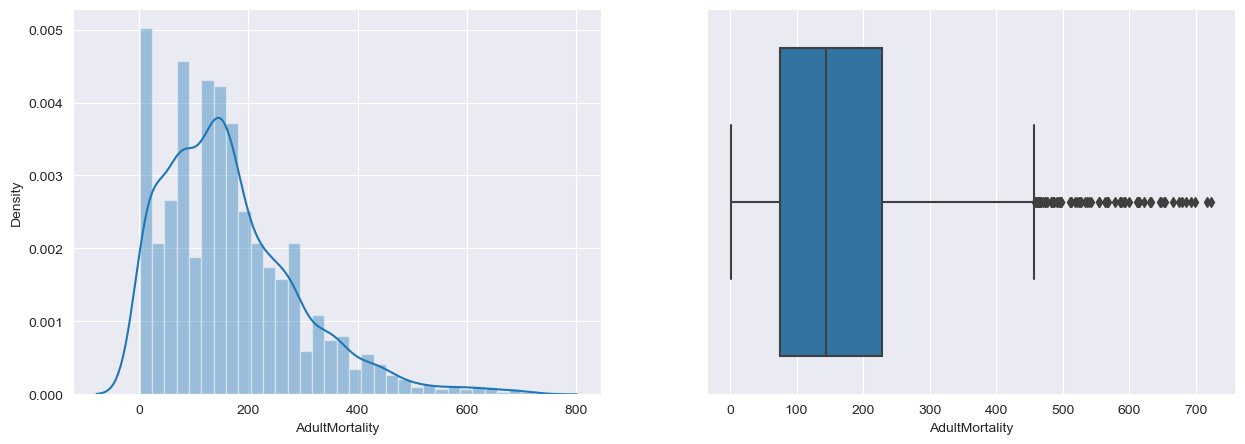

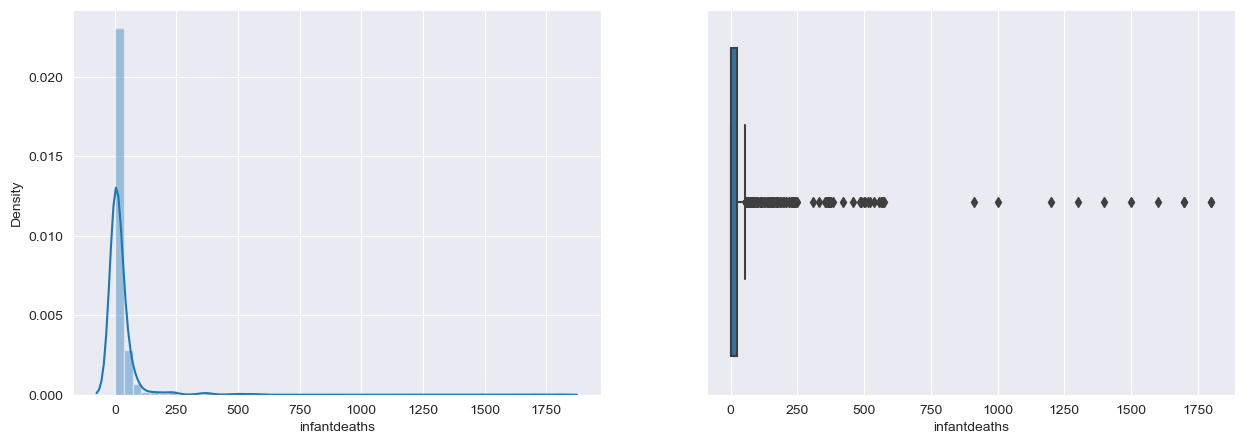

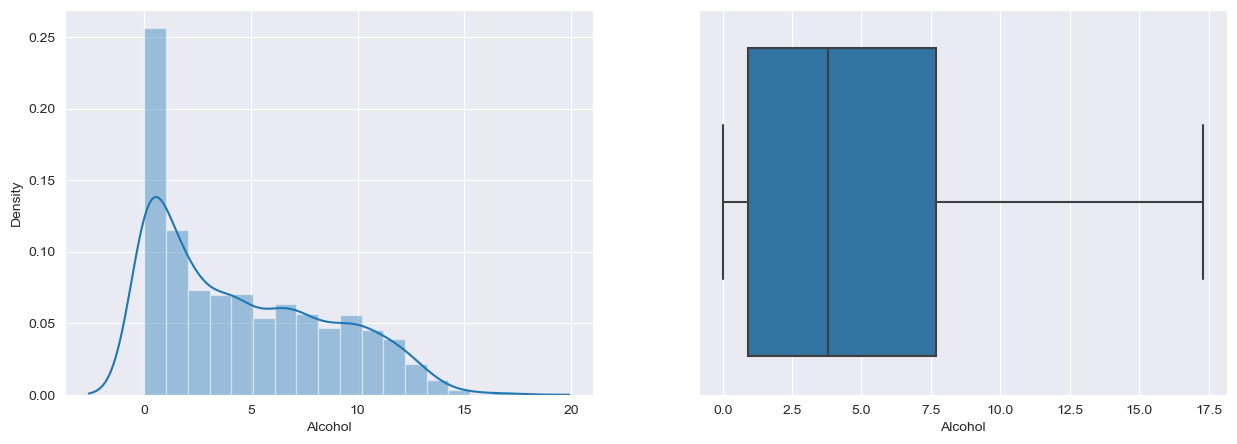

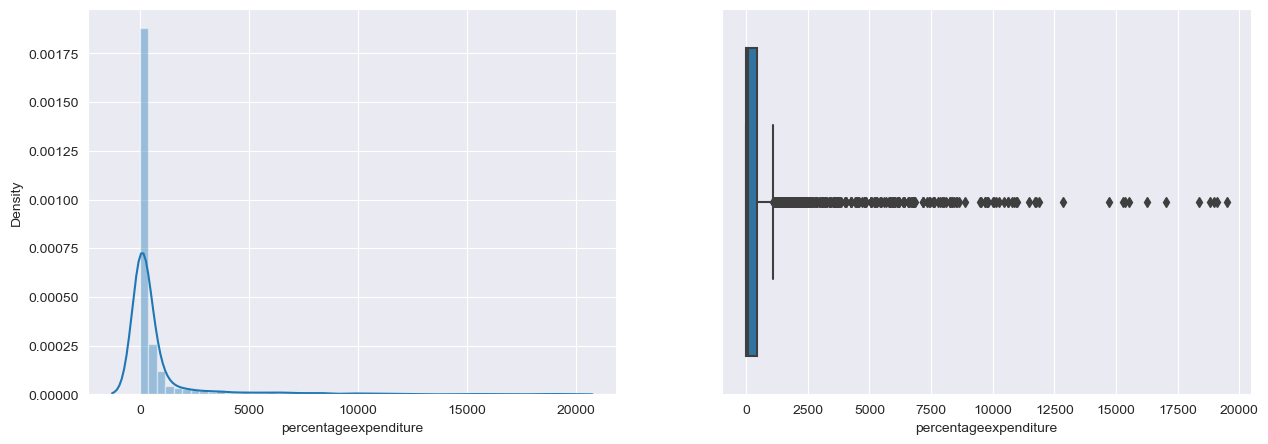

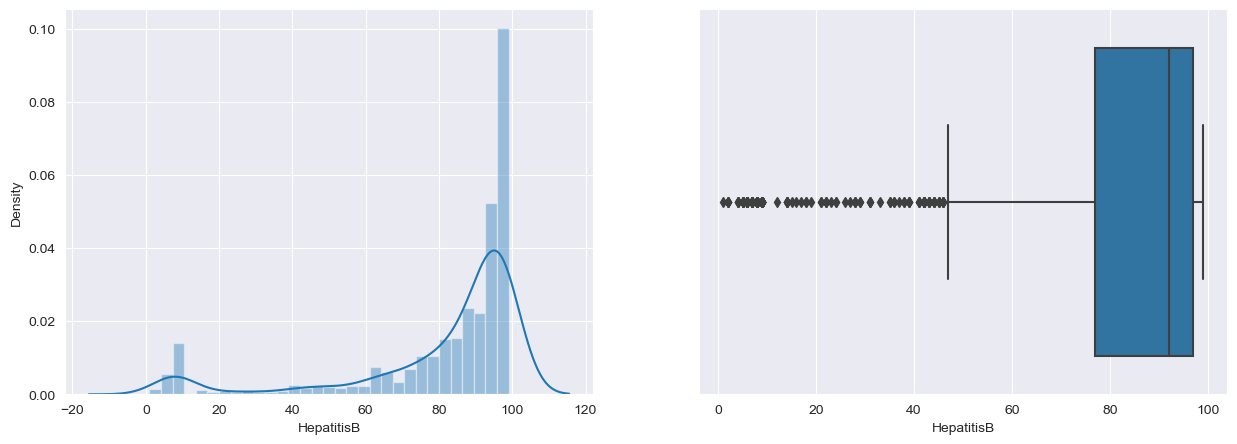

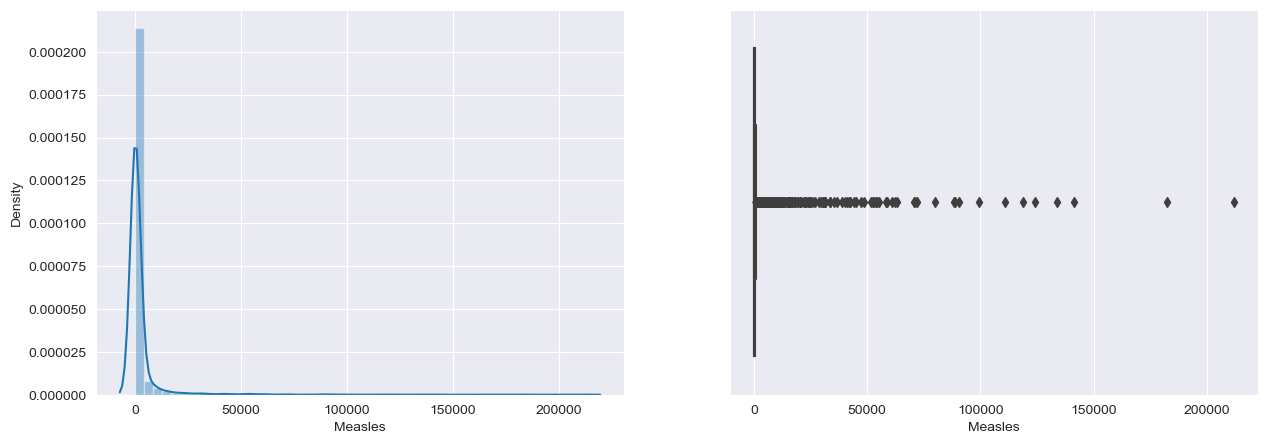

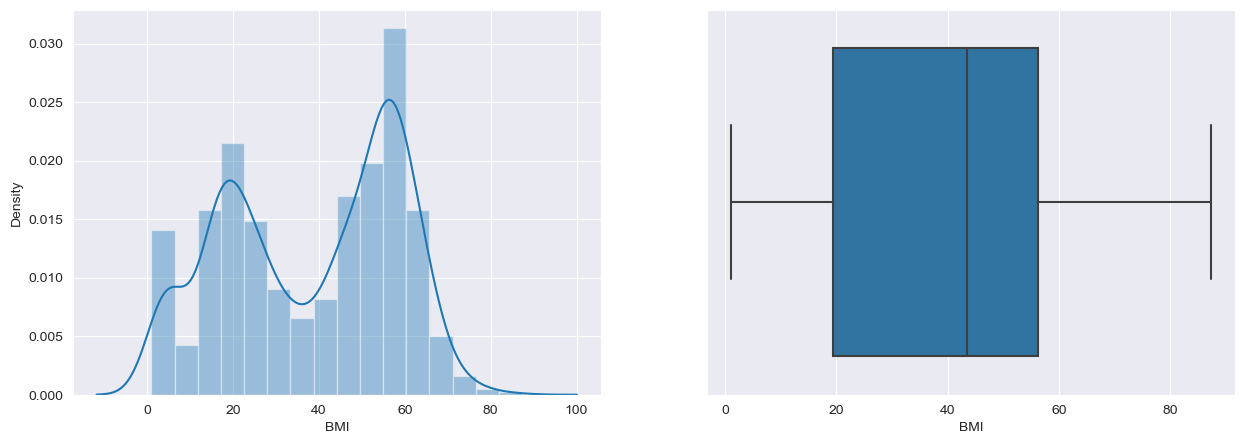

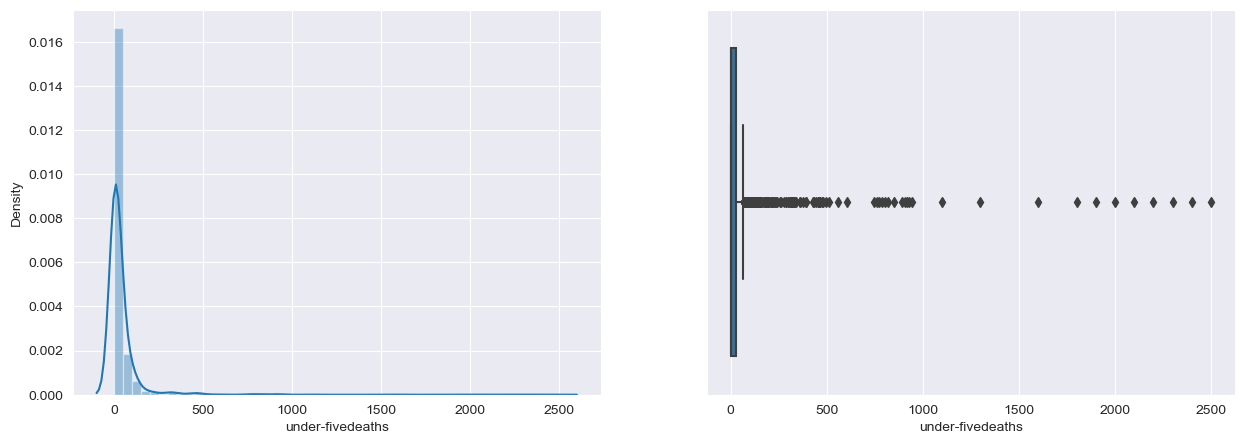

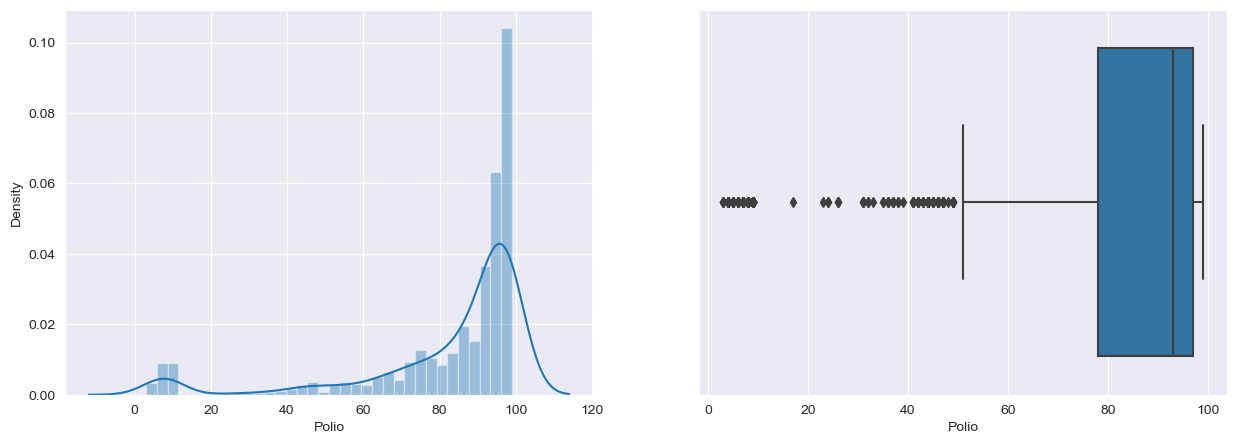

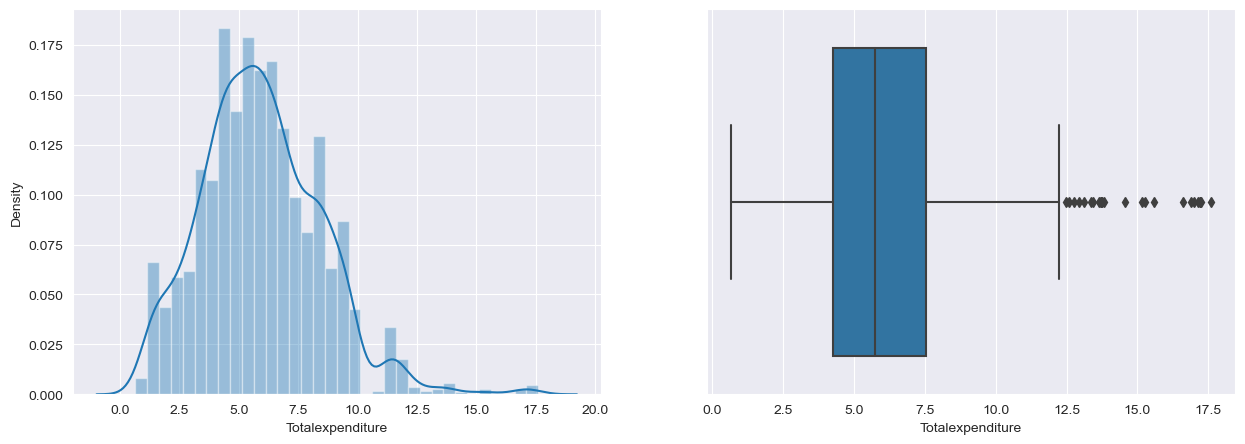

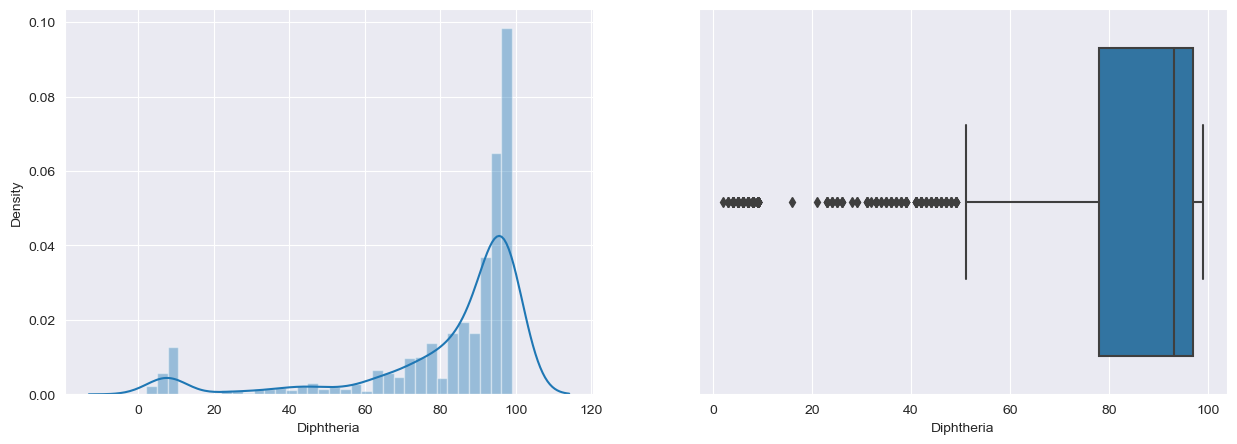

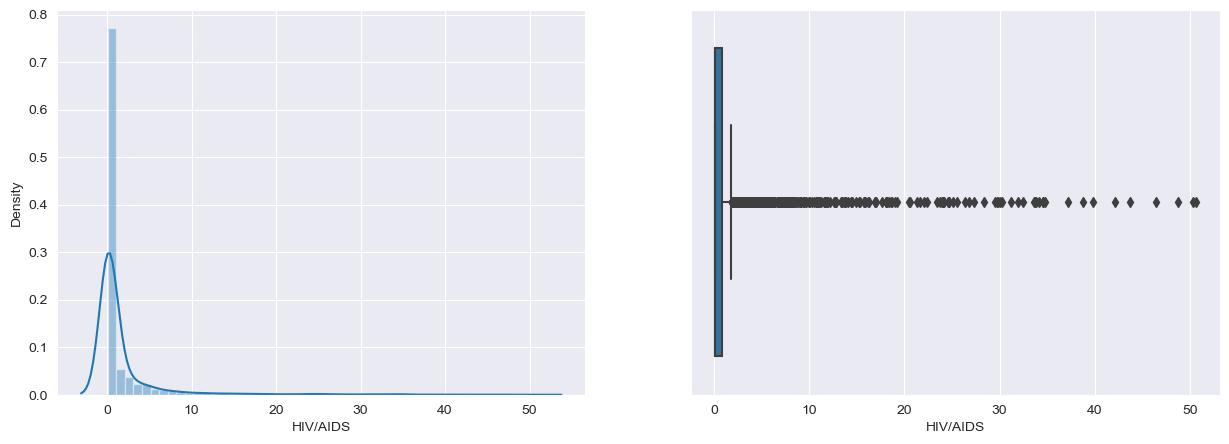

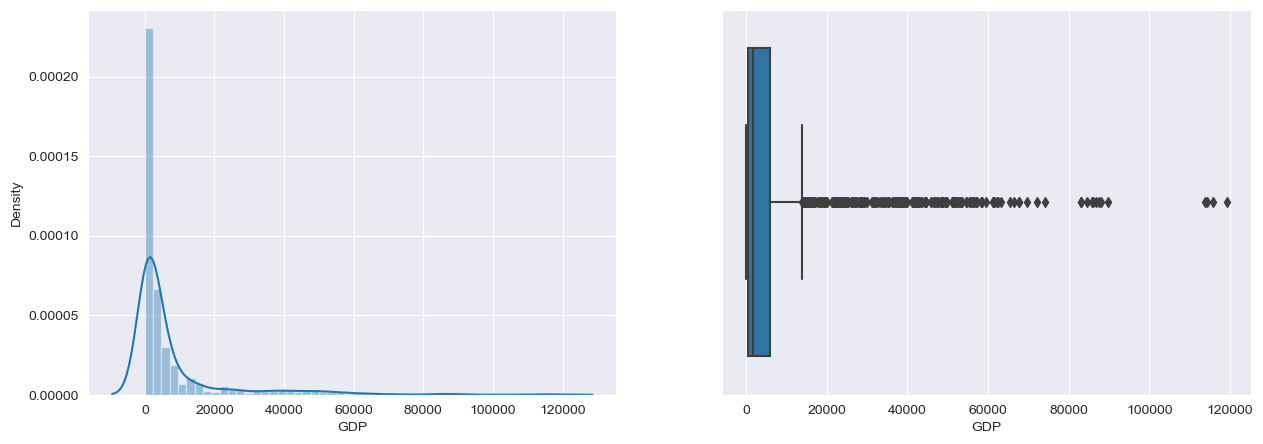

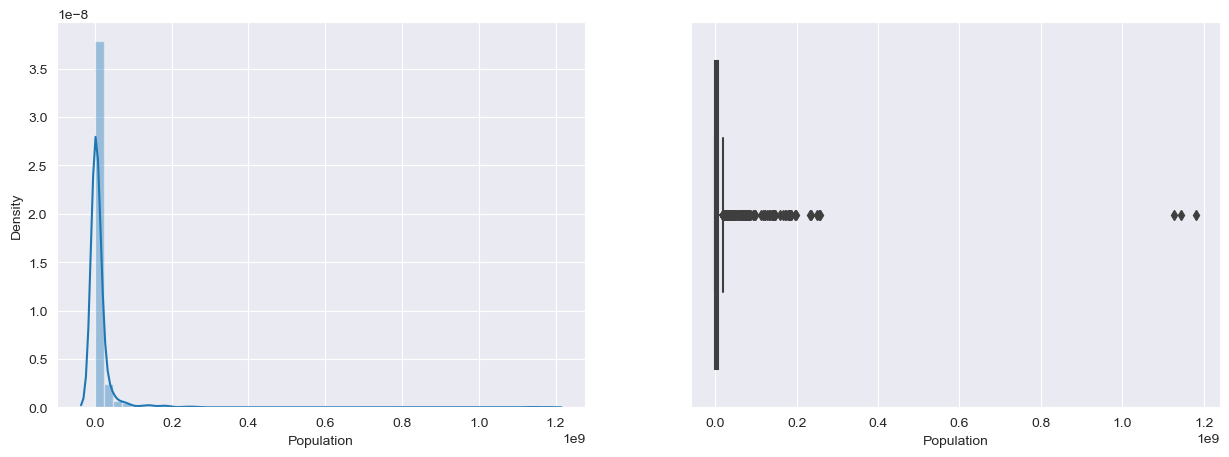

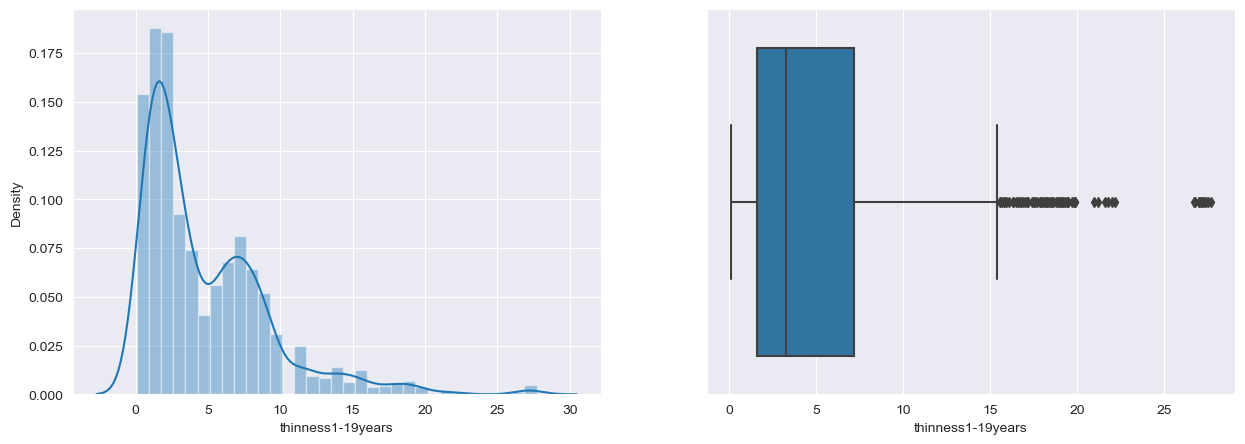

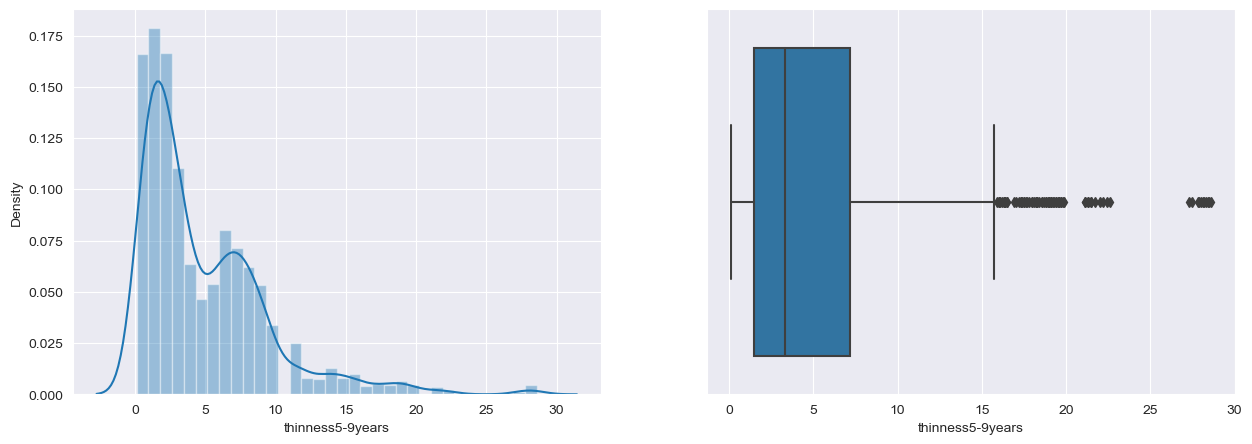

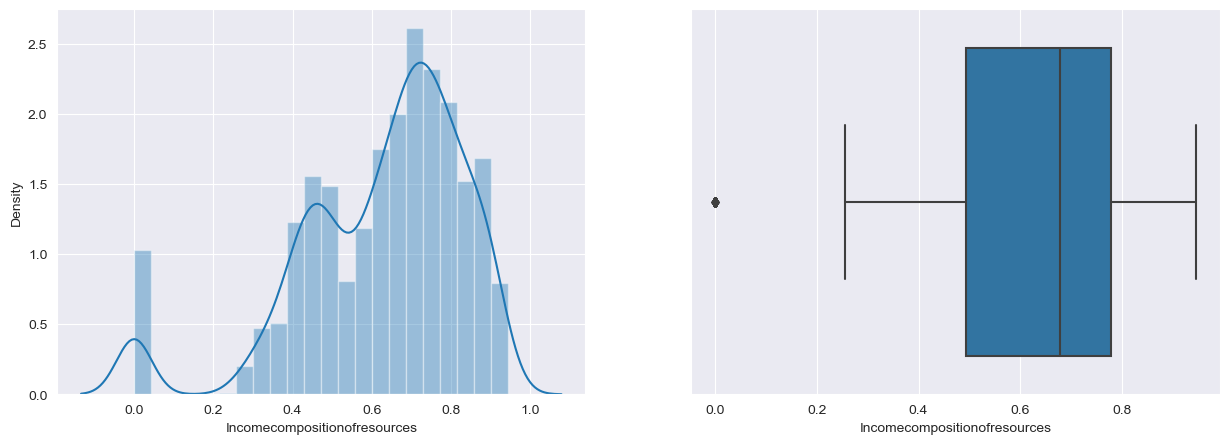

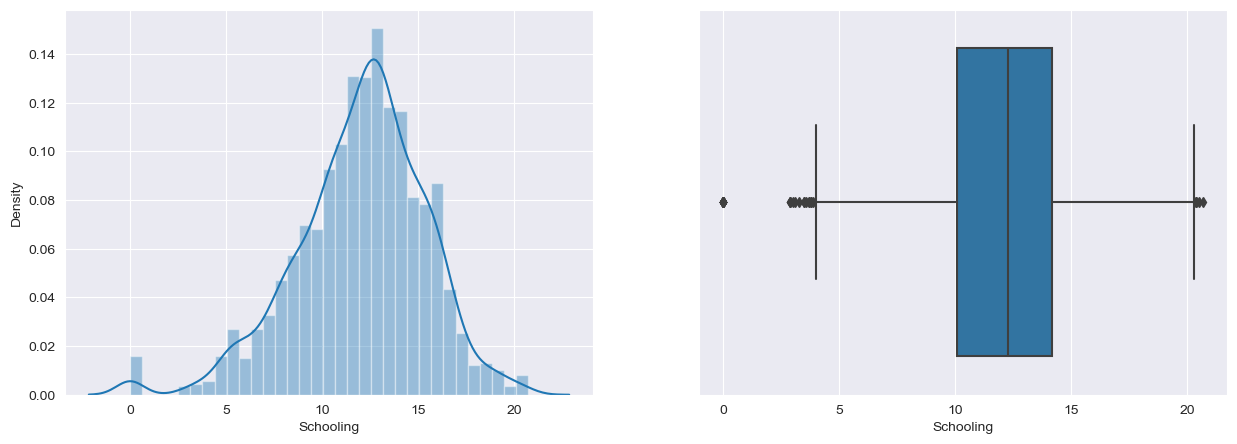

In [10]:
for col in df_train[num_col].drop(columns='Year').columns:
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    sns.distplot(df_train[col], ax=ax[0] )
    sns.boxplot(x=df_train[col], ax=ax[1] )

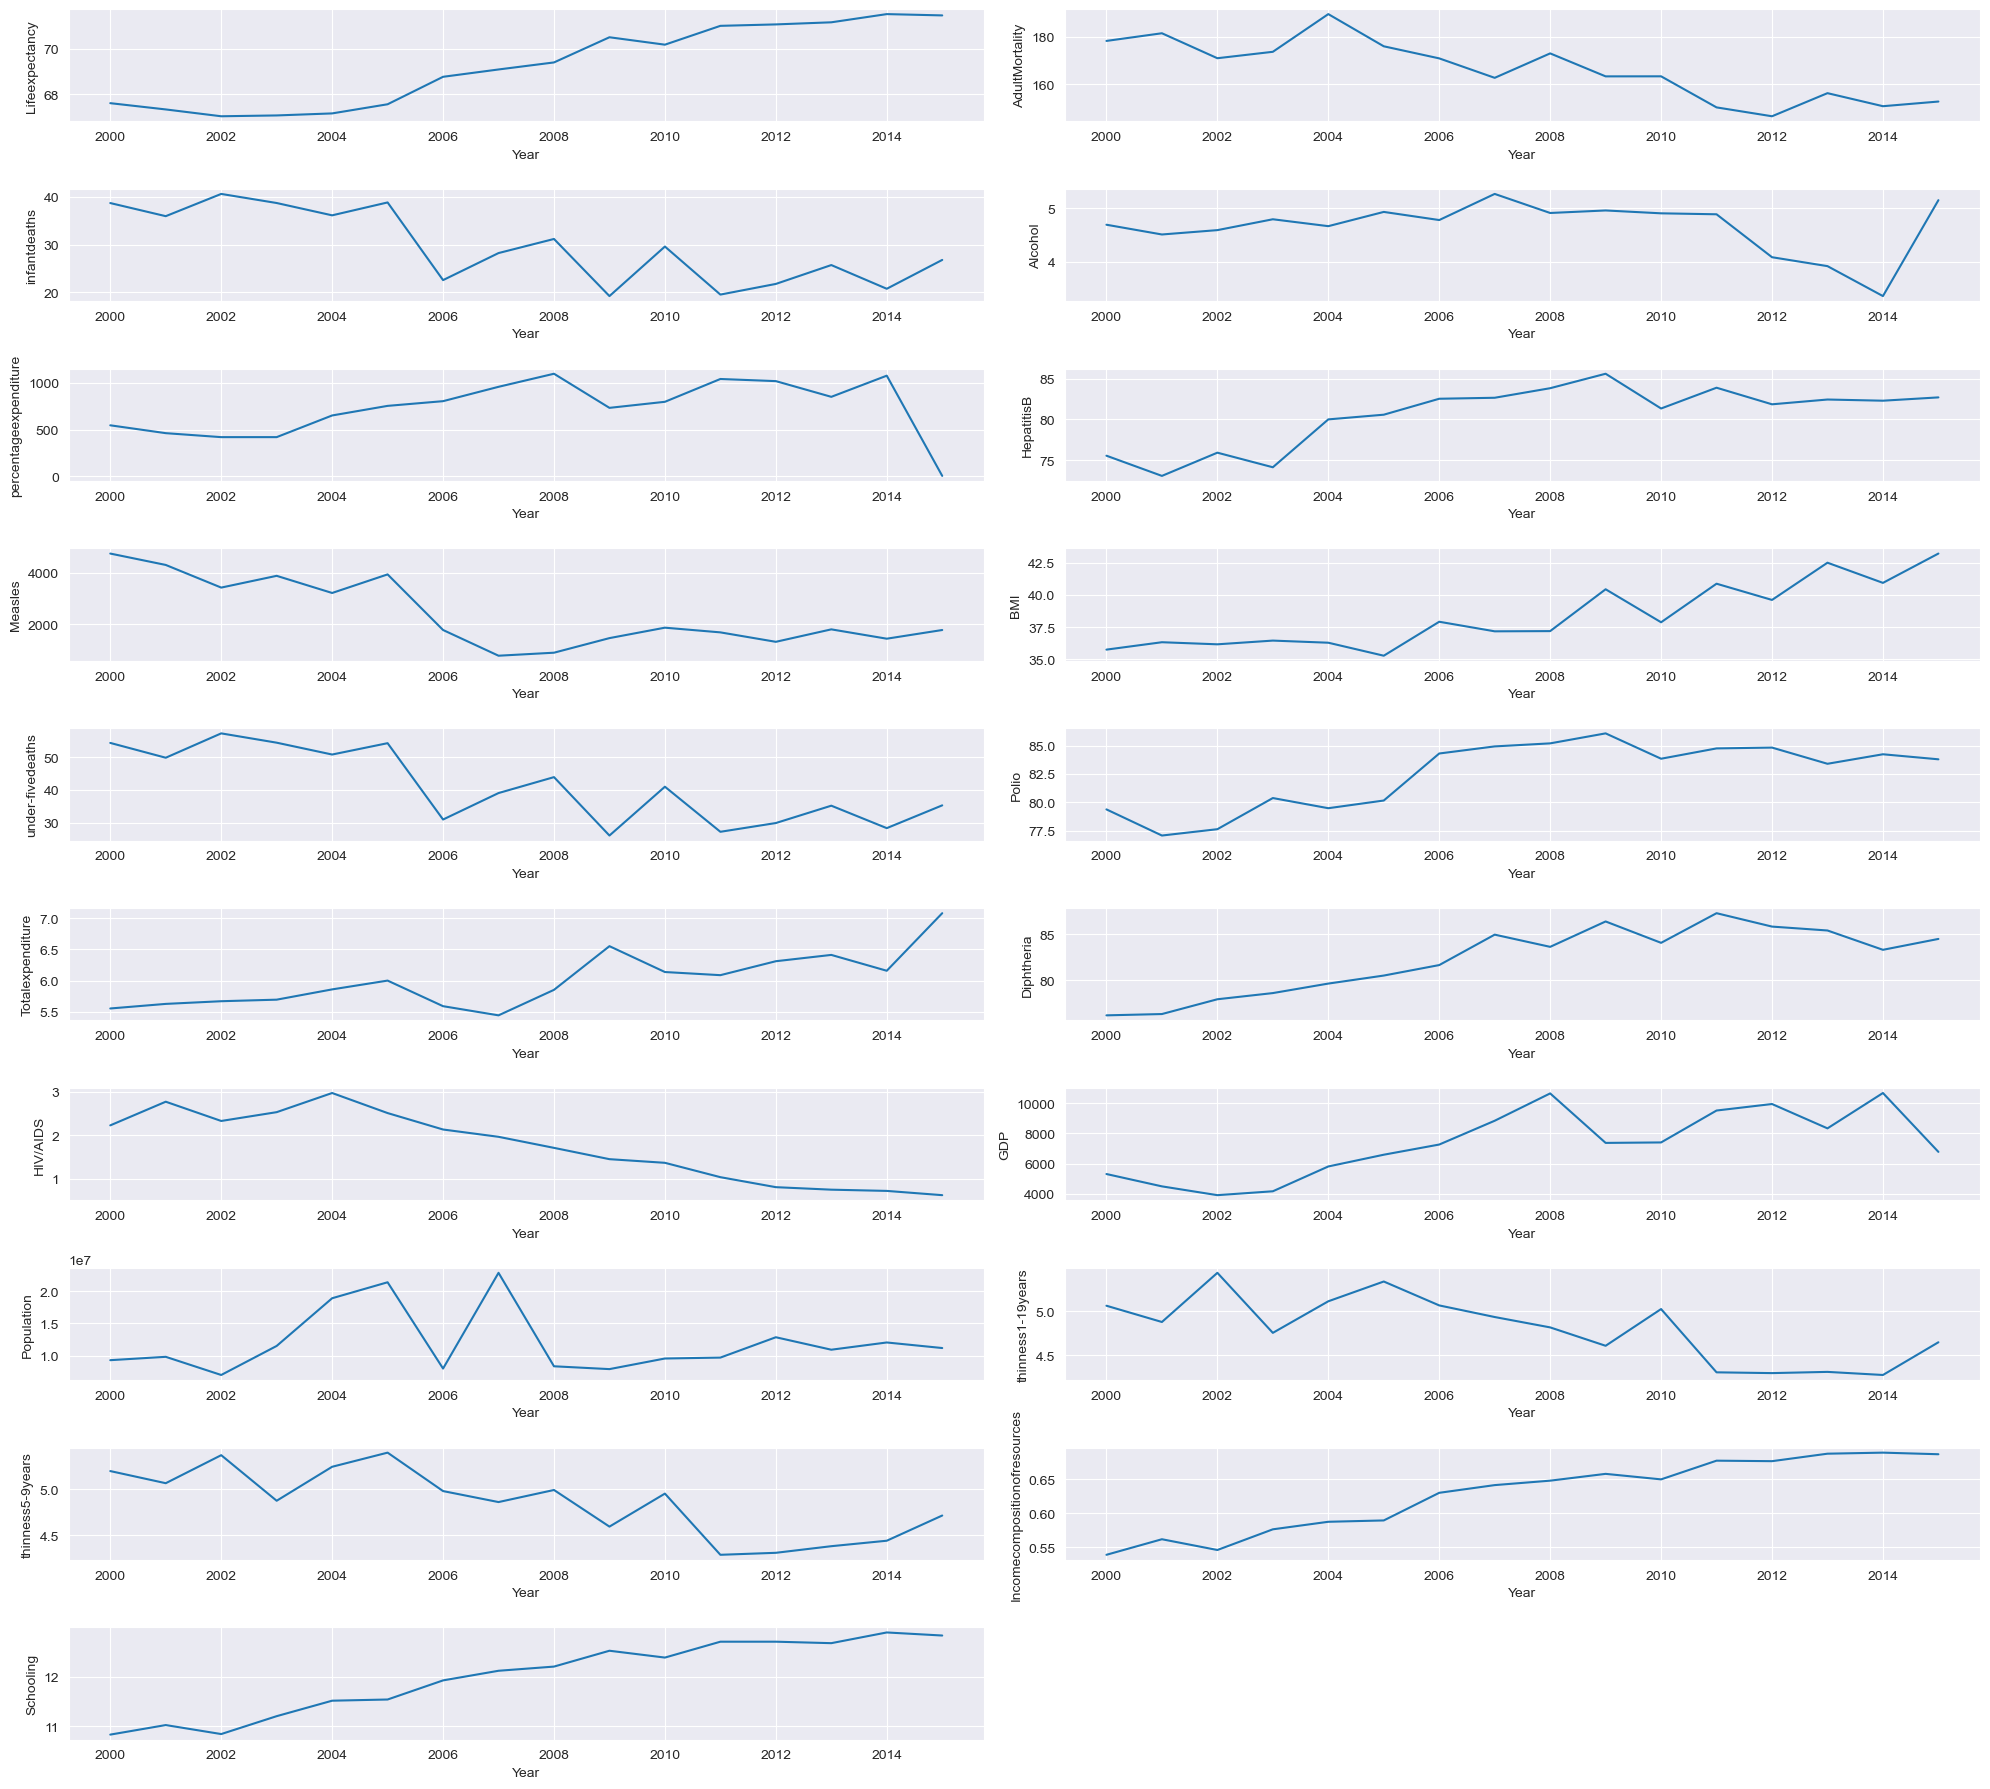

In [11]:
fig,axes=plt.subplots(nrows=len(df_train[num_col].columns)//2 ,ncols=2,figsize=(20,18))
for idx,col in enumerate(df_train[num_col].drop(columns='Year').columns):
    row_idx=idx//2
    col_idx=idx%2
    sns.lineplot(x='Year',y=df_train[col],data=df_train,ax=axes[row_idx,col_idx],markers=True,ci=None)
fig.delaxes(axes[9,1])
plt.tight_layout()
plt.show()


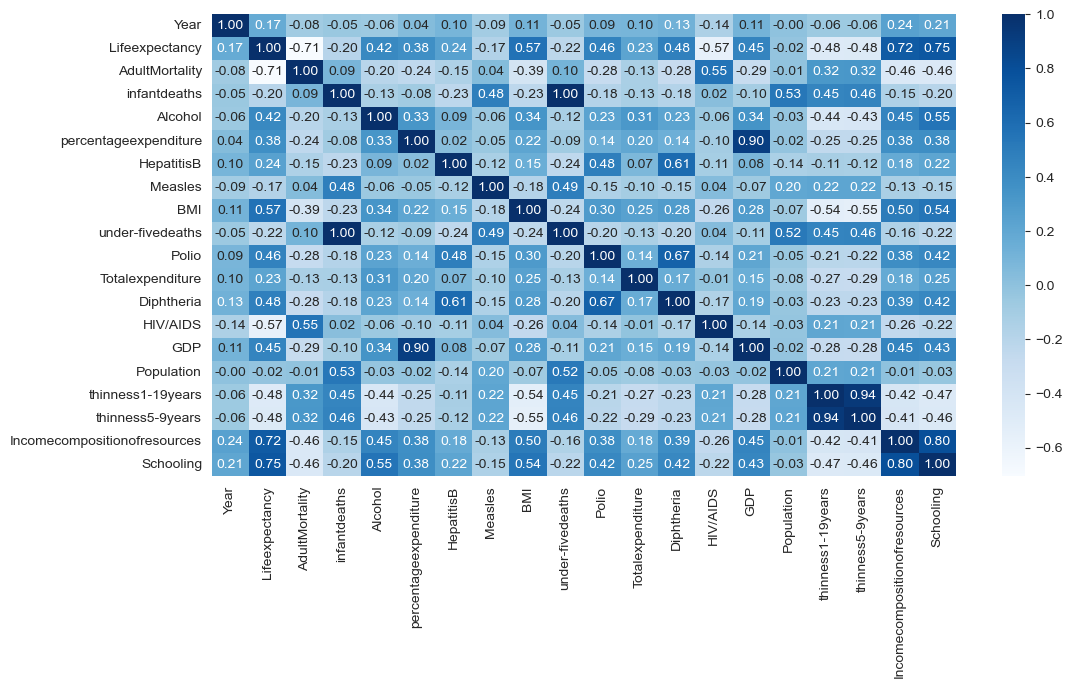

In [15]:
corr = df_train.corr()
mask = np.triu(corr)
mask=mask
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.show()